In [1]:
from sympy.solvers.pde import pdsolve
from sympy import Function, diff, Eq
from sympy.abc import x, y, z
import sympy as sym

# Introduction

In [2]:
f = Function('f')
u = f(x, y)

ux = u.diff(x)
uy = u.diff(y)

In [3]:
ux

Derivative(f(x, y), x)

In [4]:
uy

Derivative(f(x, y), y)

In [5]:
eq = Eq(1 + (2*(ux/u)) + (3*(uy/u)), 0)
eq

Eq(1 + 2*Derivative(f(x, y), x)/f(x, y) + 3*Derivative(f(x, y), y)/f(x, y), 0)

In [6]:
pdsolve(eq)

Eq(f(x, y), F(3*x - 2*y)*exp(-2*x/13 - 3*y/13))

# Other Example

In [7]:
x,y,z,c = sym.var('x , y , z, c')
u = Function('u')
w = Function('w')

f = u(x, y, z)

ux = f.diff(x)
uy = f.diff(y)
uz = f.diff(z)

In [8]:
eq = Eq(y * ux + z * uy + (c**2 - y - x**2/2) * uz, 0)
eq

Eq(y*Derivative(u(x, y, z), x) + z*Derivative(u(x, y, z), y) + (c**2 - x**2/2 - y)*Derivative(u(x, y, z), z), 0)

In [9]:
u = sym.exp(z*(c**2 - y - x**2/2))
u

exp(z*(c**2 - x**2/2 - y))

In [10]:
ux = u.diff(x)
ux

-x*z*exp(z*(c**2 - x**2/2 - y))

In [11]:
uy = u.diff(y)
uy

-z*exp(z*(c**2 - x**2/2 - y))

In [12]:
uz = u.diff(z)
uz

(c**2 - x**2/2 - y)*exp(z*(c**2 - x**2/2 - y))

In [13]:
expr = y * ux + z * uy + (c**2 - y - x**2/2) * uz
sym.simplify(expr)

(-x*y*z - z**2 + (-2*c**2 + x**2 + 2*y)**2/4)*exp(-z*(-2*c**2 + x**2 + 2*y)/2)

# Examples Derivatives and Series

In [14]:
x = sym.Symbol('x')
y = sym.Symbol('y')

In [15]:
sym.diff(sym.sin(x), x)

cos(x)

In [16]:
sym.limit((sym.tan(x + y) - sym.tan(x)) / y, y, 0)

tan(x)**2 + 1

In [17]:
print('f(x) =', sym.sin(2 * x))
sym.diff(sym.sin(2 * x), x, 1)

f(x) = sin(2*x)


2*cos(2*x)

In [18]:
sym.series(sym.cos(x), x)

1 - x**2/2 + x**4/24 + O(x**6)

In [19]:
f, g = sym.symbols('f g', cls=sym.Function)

sym.dsolve(f(x).diff(x, x) + f(x), f(x))

Eq(f(x), C1*sin(x) + C2*cos(x))

# Differential Equations

In [20]:
f(x).diff(x, x) + f(x)

f(x) + Derivative(f(x), (x, 2))

In [21]:
sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x), f(x), hint='separable') 

[Eq(f(x), -acos(C1/cos(x)) + 2*pi), Eq(f(x), acos(C1/cos(x)))]

In [22]:
bernoulli = x * f(x).diff(x) + f(x) - f(x)**2
bernoulli

x*Derivative(f(x), x) - f(x)**2 + f(x)

In [23]:
sym.dsolve(bernoulli, f(x), hint='separable') 

Eq(f(x), -C1/(-C1 + x))

In [24]:
sym.dsolve(bernoulli, f(x), hint='Bernoulli') 

Eq(f(x), 1/(C1*x + 1))

In [25]:
sym.diff(f(x) * g(x), x, 1)

f(x)*Derivative(g(x), x) + g(x)*Derivative(f(x), x)

In [26]:
sym.diff(f(x) / g(x), x, 1)

-f(x)*Derivative(g(x), x)/g(x)**2 + Derivative(f(x), x)/g(x)

In [27]:
sym.diff(f(x) + g(x), x, 1)

Derivative(f(x), x) + Derivative(g(x), x)

# Bernoulli Equation

In [28]:
sym.series(sym.cos(x), x)

1 - x**2/2 + x**4/24 + O(x**6)

In [29]:
f, g = sym.symbols('f g', cls=sym.Function)

sym.dsolve(f(x).diff(x, x) + f(x), f(x))

Eq(f(x), C1*sin(x) + C2*cos(x))

In [30]:
f(x).diff(x, x) + f(x)

f(x) + Derivative(f(x), (x, 2))

In [31]:
sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x), f(x), hint='separable') 

[Eq(f(x), -acos(C1/cos(x)) + 2*pi), Eq(f(x), acos(C1/cos(x)))]

In [32]:
bernoulli = x * f(x).diff(x) + f(x) - f(x)**2
bernoulli

x*Derivative(f(x), x) - f(x)**2 + f(x)

In [33]:
sym.dsolve(bernoulli, f(x), hint='separable') 

Eq(f(x), -C1/(-C1 + x))

In [34]:
sym.dsolve(bernoulli, f(x), hint='Bernoulli') 

Eq(f(x), 1/(C1*x + 1))

# Using Gekko to Solve ODE

* https://apmonitor.com/pdc/index.php/Main/PythonDifferentialEquations

In [37]:
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model
k = 0.3        # constant
y = m.Var(5.0) # create GEKKO variable
m.Equation(y.dt()==-k*y) # create GEEKO equation
m.time = np.linspace(0,20) # time points

# solve ODE
m.options.IMODE = 4
m.solve()

apm 189.33.65.220_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:             98
 Number of total equations: -           98
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

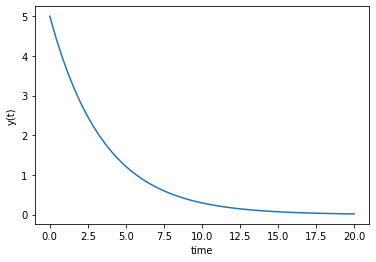

In [38]:
# plot results
plt.plot(m.time,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# References

* [A new ode integrator function in scipy.](http://kitchingroup.cheme.cmu.edu/blog/2018/09/04/A-new-ode-integrator-function-in-scipy/)
* [scipy.integrate.odeint.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
* [The SIR epidemic model.](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)
* []()